### Digital Image Processing 

Student: Anderson Rafhael; 18113000

Quiz 2: Images Transformation

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import cv2 as cv


In [20]:
# General Functions

def showImages(original, result, tittle):
    
    plt.figure()
    plt.subplots(figsize=(10, 7))
    
    
    plt.subplot(121)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB)) 
    plt.title('Original Image')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(122) 
    plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
    plt.title(tittle)
    plt.xticks([]), plt.yticks([])
    
    plt.show()
    
def plot_histogram(img):
    # Grayscale image
    if len(img.shape) == 2:
        hist = cv.calcHist([img], [0], None, [256], [0, 256])
        plt.plot(hist, color='k')
        plt.show()
    # Color image
    elif len(img.shape) == 3:
        color = ('r', 'g', 'b')
        for i, col in enumerate(color):
            hist = cv.calcHist([img], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
            
    plt.show()
    return None
    
def showHistogram(image, tittle):
    
    plt.figure()
    plt.subplots(figsize=(10, 7))
    
    plt.subplot(121)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)) 
    plt.title(tittle)
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(122) 
    plt.title('Histograma')
    plt.hist(image.ravel(), 256, [0, 256])
    #plt.xticks([]), plt.yticks([])
    
    plt.show()

### Question 1: Crop and flip an image using Numpy array indexing.

<Figure size 640x480 with 0 Axes>

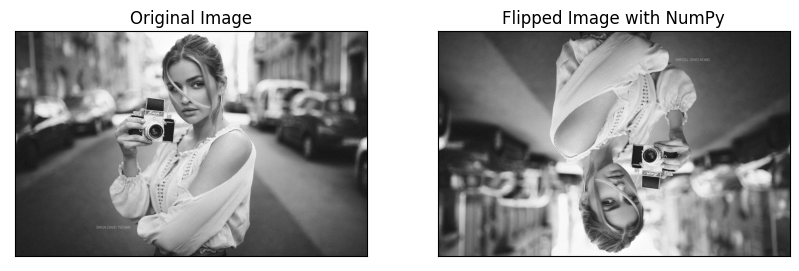

<Figure size 640x480 with 0 Axes>

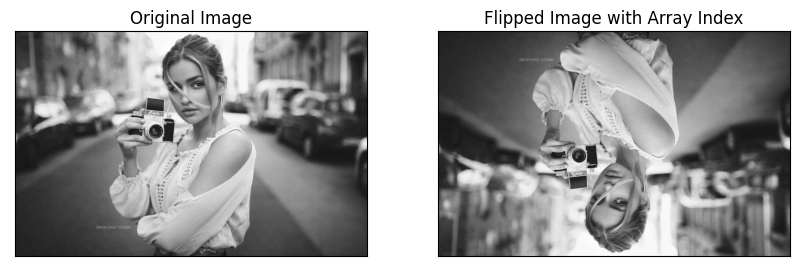

(850, 1332, 3)


<Figure size 640x480 with 0 Axes>

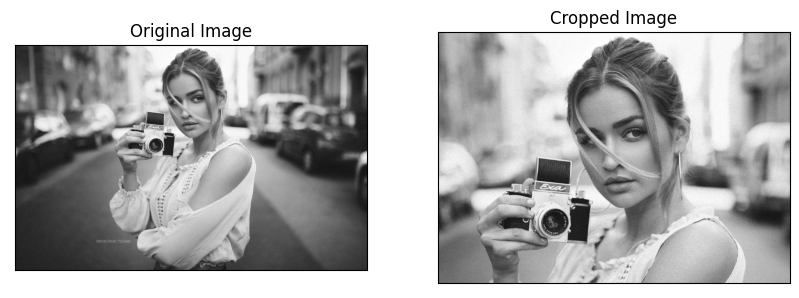

<Figure size 640x480 with 0 Axes>

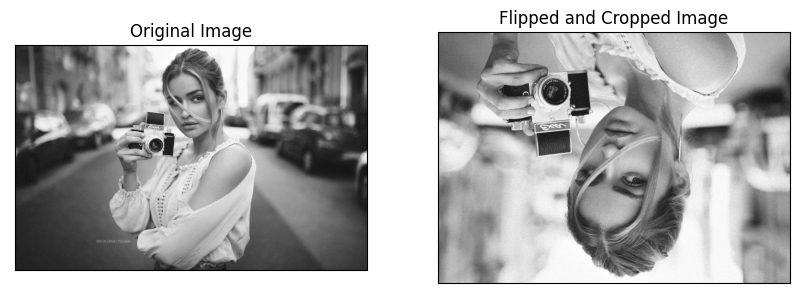

In [3]:
img = cv.imread('images/girl.jpg')

dst = np.flip(img)
showImages(img, dst, 'Flipped Image with NumPy')

dst = img[::-1, ::1]
showImages(img, dst, 'Flipped Image with Array Index')


img = cv.imread('images/girl.jpg')
print(np.shape(img))

dst = img[0:500, 300:1000]

showImages(img, dst, 'Cropped Image')

dst = img[0:500, 300:1000]
flip = dst[::-1, ::1]


showImages(img, flip, 'Flipped and Cropped Image')



### Question 2: Implement image translation using Numpy and OpenCV

<Figure size 640x480 with 0 Axes>

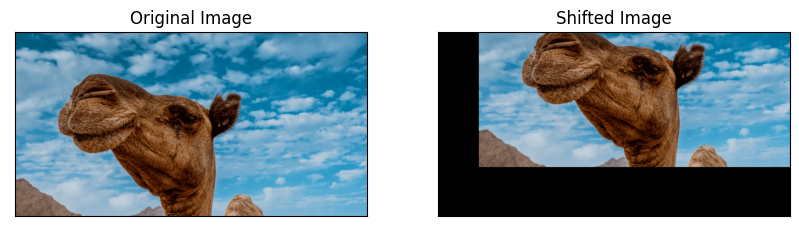

In [4]:
img = cv.imread('images/camel.png')

tx = 250
ty = -300

translationMatrix = np.float32([[1, 0, tx],
                                [0, 1, ty]
                                ])

dst = cv.warpAffine(img, translationMatrix, (img.shape[1], img.shape[0]))
showImages(img, dst, 'Shifted Image')

### Question 3: Implement image rotation using Numpy and OpenCV

<Figure size 640x480 with 0 Axes>

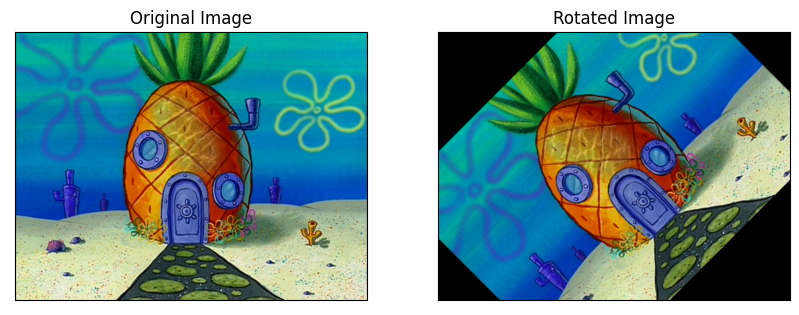

In [5]:
img = cv.imread('images/spongebob.png')

height, width = img.shape[:2]
center = (width // 2, height // 2)

rotationMatrix = cv.getRotationMatrix2D(center, angle=45, scale=1.0)

dst = cv.warpAffine(img, rotationMatrix, (width, height))
showImages(img, dst, 'Rotated Image')

### Question 4: Implement image resizing using OpenCV

Original Dimensions:  (800, 1051, 3)
Resized Dimensions:  (160, 210, 3)


<Figure size 640x480 with 0 Axes>

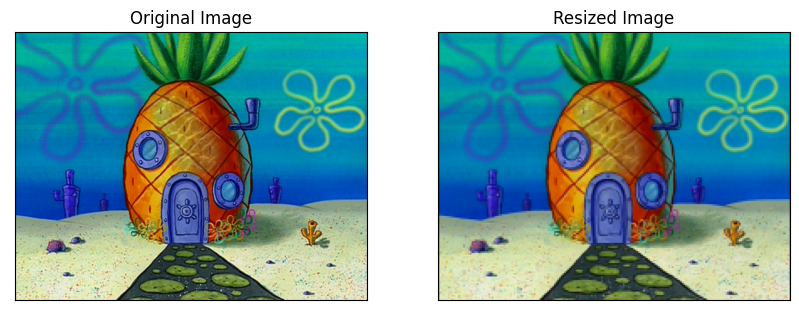

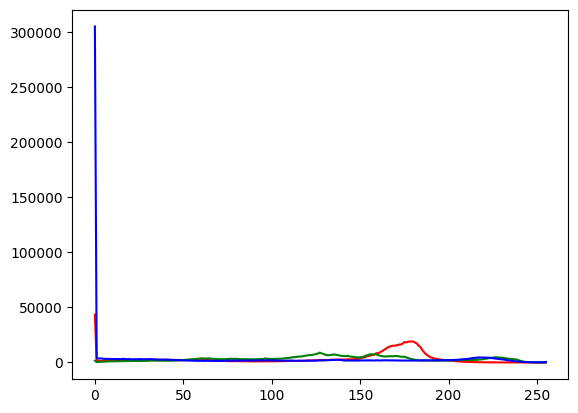

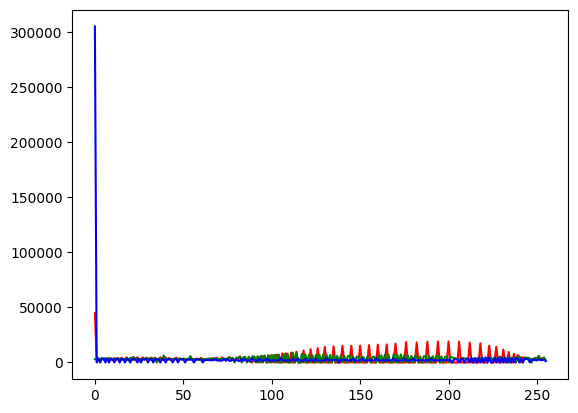

In [21]:
img = cv.imread('images/spongebob.png')
height, width = img.shape[:2]

print('Original Dimensions: ', img.shape)

newWidth = int(width * 0.2)
newHeight = int(height * 0.2)
dim = (newWidth, newHeight)

dst = cv.resize(img, dim, interpolation=cv.INTER_AREA)

print('Resized Dimensions: ', dst.shape)
showImages(img, dst, 'Resized Image')

b, g, r = cv.split(img)

dstb = cv.equalizeHist(b)
dstg = cv.equalizeHist(g)
dstr = cv.equalizeHist(r)

dst2 = cv.merge((dstb, dstg ,dstr))

plot_histogram(img)
plot_histogram(dst2)

### Question 5: Implement bitwise operations: AND, OR, XOR

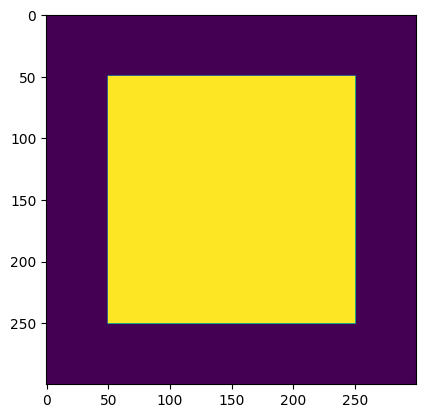

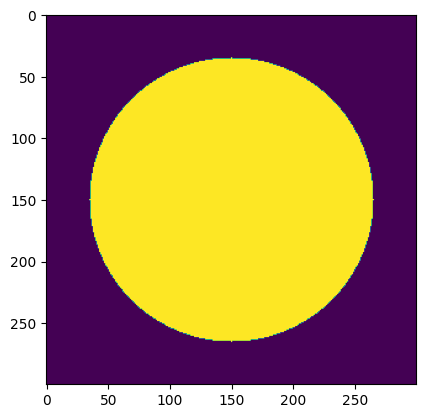

In [ ]:
# Making a square
square = np.zeros((300, 300), np.uint8)
cv.rectangle(square, (50, 50), (250, 250), 255, -2)
plt.imshow(square)
plt.show()

# Making a circle
circle = np.zeros((300, 300), np.uint8)
cv.circle(circle, (150, 150), 115, 255, -1)
plt.imshow(circle)
plt.show()

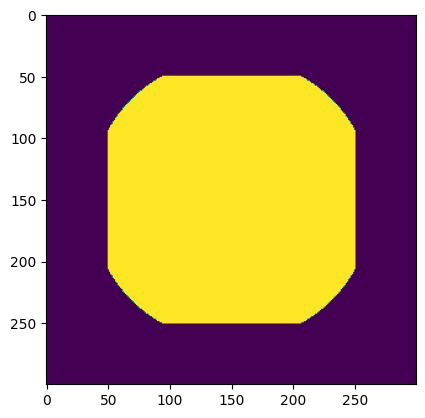

In [ ]:
# Bitwise Operation AND
bitwiseAnd = cv.bitwise_and(square, circle)
plt.imshow(bitwiseAnd)
plt.show()

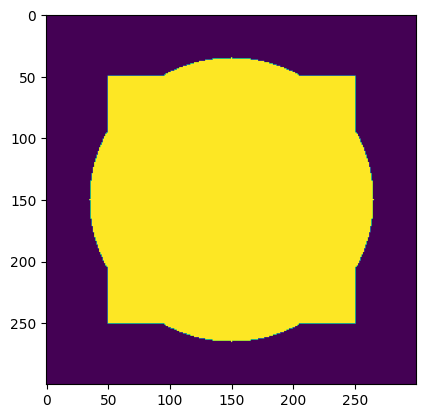

In [ ]:
# Bitwise Operation OR
bitwiseOr = cv.bitwise_or(square, circle)
plt.imshow(bitwiseOr)
plt.show()

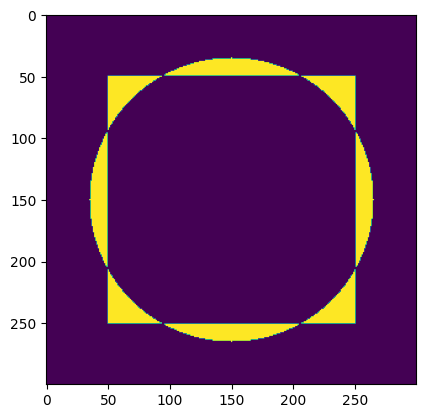

In [ ]:
# Bitwise Operation XOR
bitwiseXor = cv.bitwise_xor(square, circle)
plt.imshow(bitwiseXor)
plt.show()

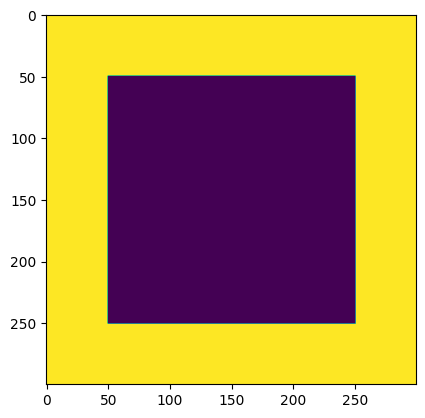

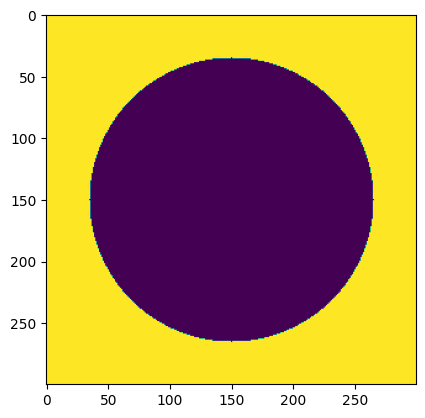

In [ ]:
# Bitwise Operation NOT
bitwiseNotSquare = cv.bitwise_not(square)
plt.imshow(bitwiseNotSquare)
plt.show()

bitwiseNotCircle = cv.bitwise_not(circle)
plt.imshow(bitwiseNotCircle)
plt.show()

### Question 6: Implement the "mask" operation, where a third image 'h' contains only a Region of Interest (ROI -- defined by the second image mask 'g') obtained from the input image 'f'. Note that this Region can be of any shape.

<Figure size 640x480 with 0 Axes>

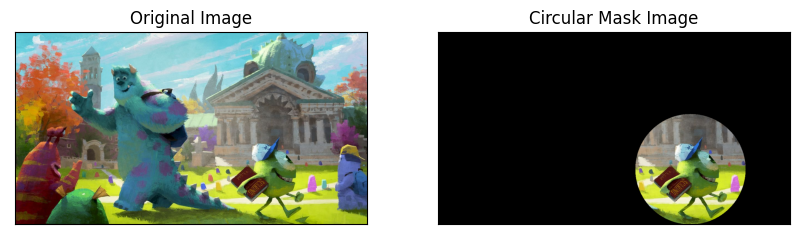

In [ ]:
img = cv.imread('images/monsters.jpg')

mask = np.zeros(img.shape[:2], dtype="uint8")
cv.circle(mask, (915, 500), 200, 255, -1)
maskedImage = cv.bitwise_and(img, img, mask=mask)

showImages(img, maskedImage, 'Circular Mask Image')